# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)
df

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,-34.660,-58.449,124000.000,160.000,120.000,3,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6372,-34.663,-58.439,90000.000,77.000,60.000,3,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6373,-34.664,-58.444,115000.000,120.000,100.000,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6374,-34.664,-58.443,99000.000,115.000,82.000,3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_test.shape

(1276, 58)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# Tener en cuenta que en este caso se utiliza El Decision Tree Regressor ya que es un problema de regresión y no de clasificación, 
# es decir nuestra predicción se trata de un número
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=5)
model = clf.fit(X_train, y_train)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción
y_pred = clf.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np

print("RMSE test: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE test:  21817.115324419887


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
rmses_train = []
rmses_test = []

for max_depth in range(1, 30, 5):
    clf = DecisionTreeRegressor(max_depth=max_depth)
    model = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, clf.predict(X_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [ ]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("RMSE test: ", np.sqrt(mean_squared_error(y_test, y_pred)))

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Calculá los cambio en el rmse en esta celda
rmses_train = []
rmses_test = []

for n_neighbors in range(1, 30, 1):
    knn = KNeighborsRegressor(n_neighbors = n_neighbors)
    model = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, knn.predict(X_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

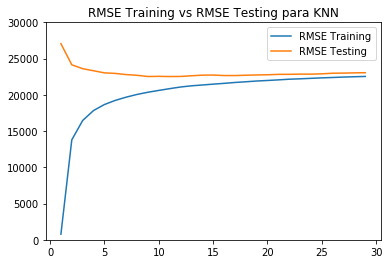

In [11]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

print("RMSE promedio: ", nmsq2rmse(scores).mean())

RMSE promedio:  22183.604232976915


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,72800.000,99223.297,26423.297
1,97000.000,120248.456,23248.456
2,75000.000,120248.456,45248.456
3,109000.000,120248.456,11248.456
4,95700.000,124894.685,29194.685
5,140000.000,152810.035,12810.035
6,143000.000,120248.456,22751.544
7,83000.000,120248.456,37248.456
8,87000.000,99223.297,12223.297
9,80000.000,89306.761,9306.761
